In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

Segmentation Models: using `tf.keras` framework.


In [4]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [5]:
input_data = '/kaggle/input/dataset/new_data2/new_data2/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data2/new_data2/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data2/new_data2/train/image/23_training_0.tif',
 '/kaggle/in

In [6]:
target_data = '/kaggle/input/dataset/new_data2/new_data2/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data2/new_data2/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data2/new_data2/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/n

In [7]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
2/train/image/21_training_0.tif | data2/train/mask/21_training_0.gif
2/train/image/21_training_1.tif | data2/train/mask/21_training_1.gif
2/train/image/21_training_2.tif | data2/train/mask/21_training_2.gif
2/train/image/21_training_3.tif | data2/train/mask/21_training_3.gif
2/train/image/21_training_4.tif | data2/train/mask/21_training_4.gif
2/train/image/21_training_5.tif | data2/train/mask/21_training_5.gif
2/train/image/22_training_0.tif | data2/train/mask/22_training_0.gif
2/train/image/22_training_1.tif | data2/train/mask/22_training_1.gif
2/train/image/22_training_2.tif | data2/train/mask/22_training_2.gif
2/train/image/22_training_3.tif | data2/train/mask/22_training_3.gif


In [16]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 12

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset
################################################3
train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.1, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [17]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(12, 512, 512, 3) (12, 512, 512, 1)
0 1
[0 1]


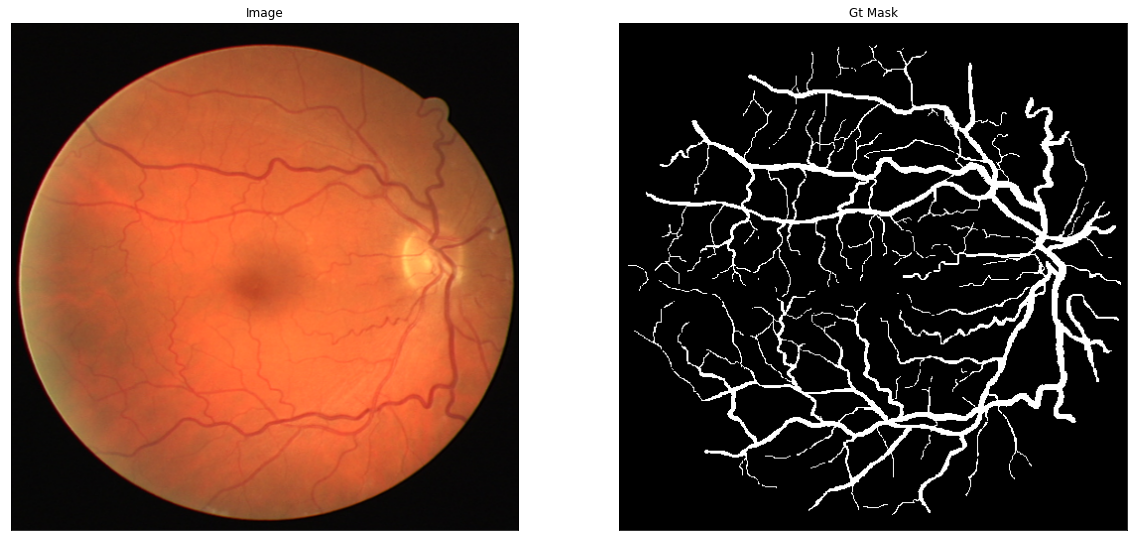

0 1
[0 1]


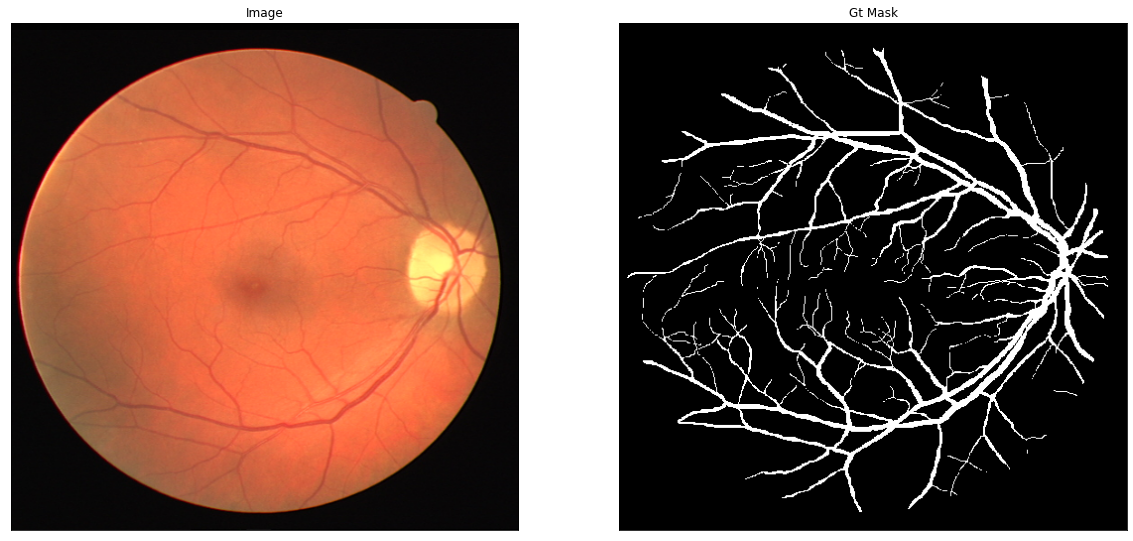

In [18]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [11]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
#improvement 1
BACKBONE   = 'vgg19'
n_classes  = 1 
activation = 'sigmoid' 
model1 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model1.summary(line_length=110)

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
input_1 (InputLayer)                [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
block1_conv1 (Conv2D)               (None, None, None, 64)  1792         input_1[0][0]                        
______________________________________________________________________________________________________________
block1_conv2 (Conv2D)               (None, None, None, 64)  36928        block1_conv1[0][0]                   
______________________________________________________________________________________________________________
block1_pool (MaxPooling2D)      

# Callback : Monitoring Training Progress

In [30]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model1.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [31]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [32]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model1.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
9/9 [==============================] - 9s 787ms/step - loss: 0.2385 - accuracy: 0.9576 - val_loss: 0.3584 - val_accuracy: 0.9509

Epoch 00001: val_loss improved from inf to 0.35841, saving model to /kaggle/Models/model1.h5
Epoch 2/250
9/9 [==============================] - 7s 746ms/step - loss: 0.2266 - accuracy: 0.9596 - val_loss: 0.3257 - val_accuracy: 0.9540

Epoch 00002: val_loss improved from 0.35841 to 0.32568, saving model to /kaggle/Models/model1.h5
Epoch 3/250
9/9 [==============================] - 7s 743ms/step - loss: 0.2174 - accuracy: 0.9602 - val_loss: 0.2909 - val_accuracy: 0.9588

Epoch 00003: val_loss improved from 0.32568 to 0.29089, saving model to /kaggle/Models/model1.h5
Epoch 4/250
9/9 [==============================] - 7s 741ms/step - loss: 0.2080 - accuracy: 0.9608 - val_loss: 0.2774 - val_accuracy: 0.9595

Epoch 00004: val_loss improved from 0.29089 to 0.27745, saving model to /kaggle/Models/model1.h5
Epoch 5/250
9/9 [==============================]

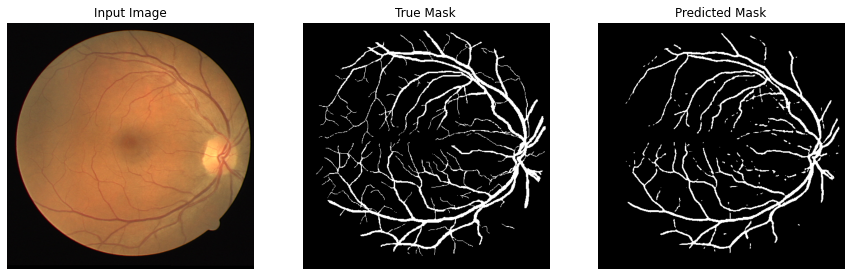


Sample Prediction after epoch 6

Epoch 7/250
9/9 [==============================] - 7s 745ms/step - loss: 0.1865 - accuracy: 0.9624 - val_loss: 0.2294 - val_accuracy: 0.9607

Epoch 00007: val_loss improved from 0.23740 to 0.22944, saving model to /kaggle/Models/model1.h5
Epoch 8/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1808 - accuracy: 0.9629 - val_loss: 0.2221 - val_accuracy: 0.9608

Epoch 00008: val_loss improved from 0.22944 to 0.22207, saving model to /kaggle/Models/model1.h5
Epoch 9/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1752 - accuracy: 0.9634 - val_loss: 0.2101 - val_accuracy: 0.9612

Epoch 00009: val_loss improved from 0.22207 to 0.21012, saving model to /kaggle/Models/model1.h5
Epoch 10/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1701 - accuracy: 0.9639 - val_loss: 0.2004 - val_accuracy: 0.9614

Epoch 00010: val_loss improved from 0.21012 to 0.20041, saving model to /kaggle/Models/model1.h5
Epoch 11/

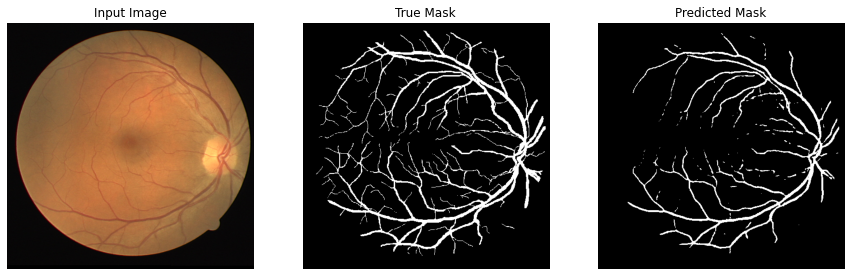


Sample Prediction after epoch 11

Epoch 12/250
9/9 [==============================] - 7s 746ms/step - loss: 0.1609 - accuracy: 0.9646 - val_loss: 0.1864 - val_accuracy: 0.9609

Epoch 00012: val_loss improved from 0.19776 to 0.18637, saving model to /kaggle/Models/model1.h5
Epoch 13/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1571 - accuracy: 0.9648 - val_loss: 0.1861 - val_accuracy: 0.9579

Epoch 00013: val_loss improved from 0.18637 to 0.18607, saving model to /kaggle/Models/model1.h5
Epoch 14/250
9/9 [==============================] - 7s 743ms/step - loss: 0.1534 - accuracy: 0.9650 - val_loss: 0.1765 - val_accuracy: 0.9615

Epoch 00014: val_loss improved from 0.18607 to 0.17649, saving model to /kaggle/Models/model1.h5
Epoch 15/250
9/9 [==============================] - 7s 743ms/step - loss: 0.1499 - accuracy: 0.9653 - val_loss: 0.1700 - val_accuracy: 0.9609

Epoch 00015: val_loss improved from 0.17649 to 0.17004, saving model to /kaggle/Models/model1.h5
Epoch

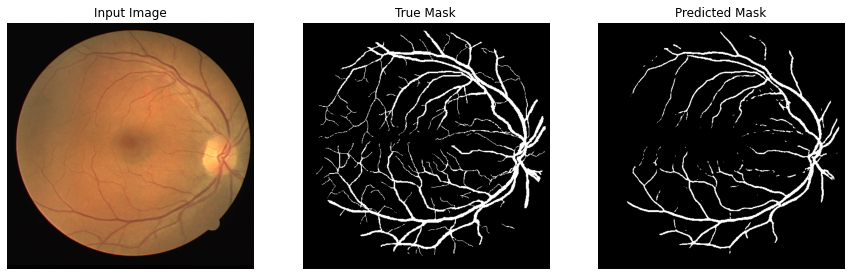


Sample Prediction after epoch 16

Epoch 17/250
9/9 [==============================] - 7s 745ms/step - loss: 0.1439 - accuracy: 0.9655 - val_loss: 0.1625 - val_accuracy: 0.9604

Epoch 00017: val_loss improved from 0.16502 to 0.16252, saving model to /kaggle/Models/model1.h5
Epoch 18/250
9/9 [==============================] - 7s 743ms/step - loss: 0.1404 - accuracy: 0.9659 - val_loss: 0.1588 - val_accuracy: 0.9612

Epoch 00018: val_loss improved from 0.16252 to 0.15882, saving model to /kaggle/Models/model1.h5
Epoch 19/250
9/9 [==============================] - 7s 742ms/step - loss: 0.1376 - accuracy: 0.9661 - val_loss: 0.1537 - val_accuracy: 0.9611

Epoch 00019: val_loss improved from 0.15882 to 0.15367, saving model to /kaggle/Models/model1.h5
Epoch 20/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1344 - accuracy: 0.9665 - val_loss: 0.1480 - val_accuracy: 0.9624

Epoch 00020: val_loss improved from 0.15367 to 0.14802, saving model to /kaggle/Models/model1.h5
Epoch

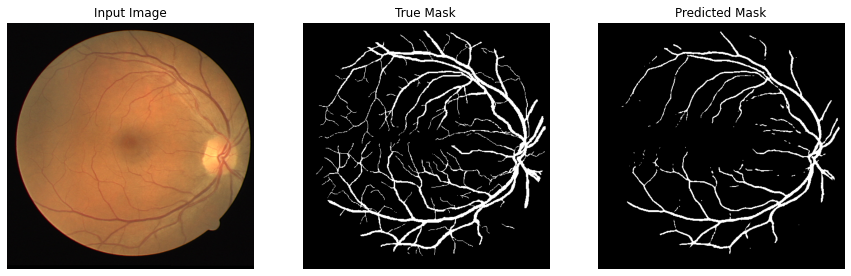


Sample Prediction after epoch 21

Epoch 22/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1283 - accuracy: 0.9672 - val_loss: 0.1467 - val_accuracy: 0.9605

Epoch 00022: val_loss improved from 0.14778 to 0.14673, saving model to /kaggle/Models/model1.h5
Epoch 23/250
9/9 [==============================] - 7s 742ms/step - loss: 0.1257 - accuracy: 0.9675 - val_loss: 0.1390 - val_accuracy: 0.9626

Epoch 00023: val_loss improved from 0.14673 to 0.13895, saving model to /kaggle/Models/model1.h5
Epoch 24/250
9/9 [==============================] - 7s 745ms/step - loss: 0.1231 - accuracy: 0.9677 - val_loss: 0.1358 - val_accuracy: 0.9623

Epoch 00024: val_loss improved from 0.13895 to 0.13577, saving model to /kaggle/Models/model1.h5
Epoch 25/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1210 - accuracy: 0.9679 - val_loss: 0.1304 - val_accuracy: 0.9632

Epoch 00025: val_loss improved from 0.13577 to 0.13040, saving model to /kaggle/Models/model1.h5
Epoch

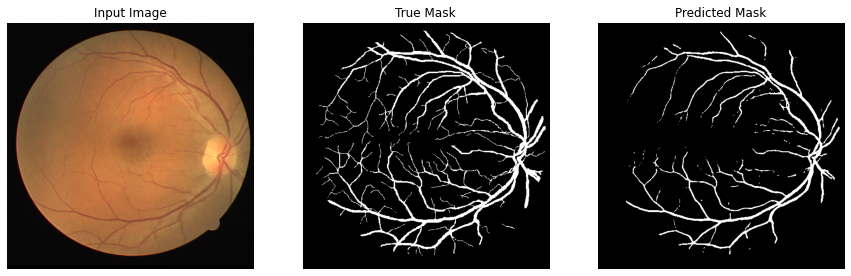


Sample Prediction after epoch 26

Epoch 27/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1157 - accuracy: 0.9686 - val_loss: 0.1295 - val_accuracy: 0.9624

Epoch 00027: val_loss improved from 0.13040 to 0.12953, saving model to /kaggle/Models/model1.h5
Epoch 28/250
9/9 [==============================] - 7s 743ms/step - loss: 0.1132 - accuracy: 0.9690 - val_loss: 0.1270 - val_accuracy: 0.9629

Epoch 00028: val_loss improved from 0.12953 to 0.12695, saving model to /kaggle/Models/model1.h5
Epoch 29/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1115 - accuracy: 0.9691 - val_loss: 0.1271 - val_accuracy: 0.9625

Epoch 00029: val_loss did not improve from 0.12695
Epoch 30/250
9/9 [==============================] - 7s 743ms/step - loss: 0.1094 - accuracy: 0.9693 - val_loss: 0.1243 - val_accuracy: 0.9634

Epoch 00030: val_loss improved from 0.12695 to 0.12431, saving model to /kaggle/Models/model1.h5
Epoch 31/250
9/9 [==============================] -

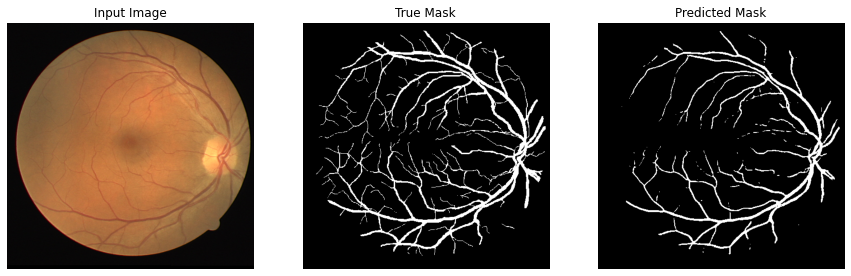


Sample Prediction after epoch 31

Epoch 32/250
9/9 [==============================] - 7s 742ms/step - loss: 0.1062 - accuracy: 0.9697 - val_loss: 0.1248 - val_accuracy: 0.9621

Epoch 00032: val_loss did not improve from 0.12222
Epoch 33/250
9/9 [==============================] - 7s 743ms/step - loss: 0.1048 - accuracy: 0.9697 - val_loss: 0.1202 - val_accuracy: 0.9632

Epoch 00033: val_loss improved from 0.12222 to 0.12021, saving model to /kaggle/Models/model1.h5
Epoch 34/250
9/9 [==============================] - 7s 743ms/step - loss: 0.1028 - accuracy: 0.9701 - val_loss: 0.1204 - val_accuracy: 0.9623

Epoch 00034: val_loss did not improve from 0.12021
Epoch 35/250
9/9 [==============================] - 7s 744ms/step - loss: 0.1014 - accuracy: 0.9702 - val_loss: 0.1158 - val_accuracy: 0.9638

Epoch 00035: val_loss improved from 0.12021 to 0.11578, saving model to /kaggle/Models/model1.h5
Epoch 36/250
9/9 [==============================] - 7s 742ms/step - loss: 0.0999 - accuracy: 0.97

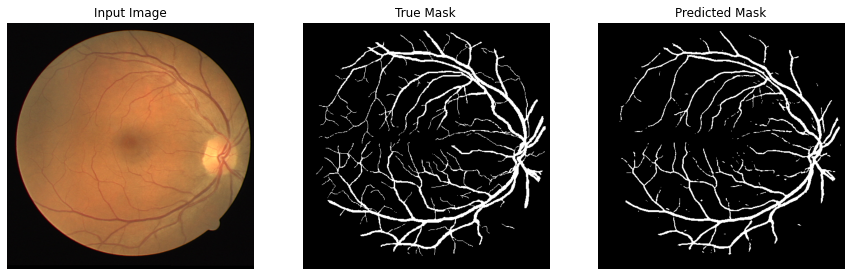


Sample Prediction after epoch 36

Epoch 37/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0985 - accuracy: 0.9705 - val_loss: 0.1177 - val_accuracy: 0.9618

Epoch 00037: val_loss did not improve from 0.11309
Epoch 38/250
9/9 [==============================] - 7s 744ms/step - loss: 0.0965 - accuracy: 0.9711 - val_loss: 0.1150 - val_accuracy: 0.9638

Epoch 00038: val_loss did not improve from 0.11309
Epoch 39/250
9/9 [==============================] - 7s 743ms/step - loss: 0.0946 - accuracy: 0.9714 - val_loss: 0.1136 - val_accuracy: 0.9637

Epoch 00039: val_loss did not improve from 0.11309
Epoch 40/250
9/9 [==============================] - 7s 743ms/step - loss: 0.0933 - accuracy: 0.9717 - val_loss: 0.1100 - val_accuracy: 0.9647

Epoch 00040: val_loss improved from 0.11309 to 0.11002, saving model to /kaggle/Models/model1.h5
Epoch 41/250
9/9 [==============================] - 7s 742ms/step - loss: 0.0922 - accuracy: 0.9718 - val_loss: 0.1090 - val_accuracy: 0.9649



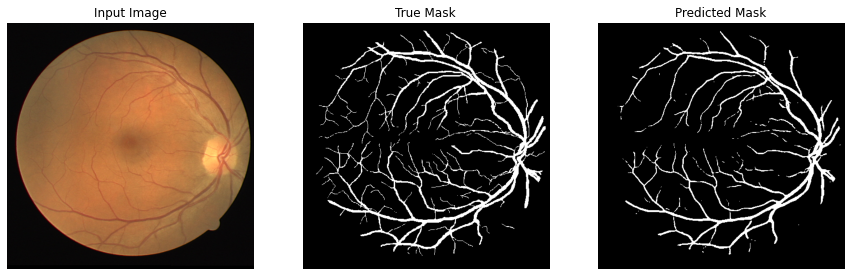


Sample Prediction after epoch 41

Epoch 42/250
9/9 [==============================] - 7s 746ms/step - loss: 0.0912 - accuracy: 0.9719 - val_loss: 0.1107 - val_accuracy: 0.9638

Epoch 00042: val_loss did not improve from 0.10898
Epoch 43/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0902 - accuracy: 0.9719 - val_loss: 0.1087 - val_accuracy: 0.9640

Epoch 00043: val_loss improved from 0.10898 to 0.10871, saving model to /kaggle/Models/model1.h5
Epoch 44/250
9/9 [==============================] - 7s 744ms/step - loss: 0.0893 - accuracy: 0.9721 - val_loss: 0.1068 - val_accuracy: 0.9647

Epoch 00044: val_loss improved from 0.10871 to 0.10680, saving model to /kaggle/Models/model1.h5
Epoch 45/250
9/9 [==============================] - 7s 742ms/step - loss: 0.0882 - accuracy: 0.9722 - val_loss: 0.1067 - val_accuracy: 0.9646

Epoch 00045: val_loss improved from 0.10680 to 0.10672, saving model to /kaggle/Models/model1.h5
Epoch 46/250
9/9 [==============================] -

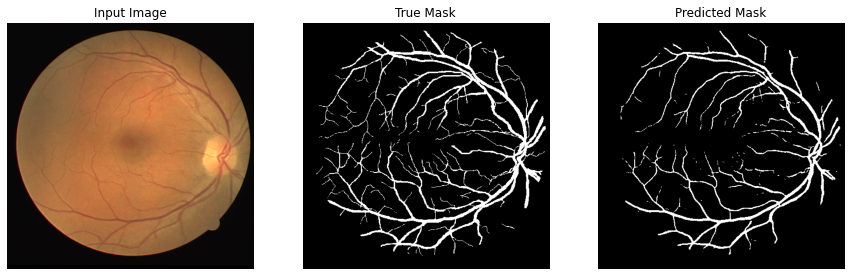


Sample Prediction after epoch 46

Epoch 47/250
9/9 [==============================] - 7s 743ms/step - loss: 0.0849 - accuracy: 0.9731 - val_loss: 0.1031 - val_accuracy: 0.9656

Epoch 00047: val_loss improved from 0.10437 to 0.10314, saving model to /kaggle/Models/model1.h5
Epoch 48/250
9/9 [==============================] - 7s 744ms/step - loss: 0.0840 - accuracy: 0.9732 - val_loss: 0.1040 - val_accuracy: 0.9649

Epoch 00048: val_loss did not improve from 0.10314
Epoch 49/250
9/9 [==============================] - 7s 743ms/step - loss: 0.0832 - accuracy: 0.9733 - val_loss: 0.1042 - val_accuracy: 0.9655

Epoch 00049: val_loss did not improve from 0.10314
Epoch 50/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0821 - accuracy: 0.9735 - val_loss: 0.1052 - val_accuracy: 0.9650

Epoch 00050: val_loss did not improve from 0.10314
Epoch 51/250
9/9 [==============================] - 7s 744ms/step - loss: 0.0809 - accuracy: 0.9739 - val_loss: 0.1053 - val_accuracy: 0.9647



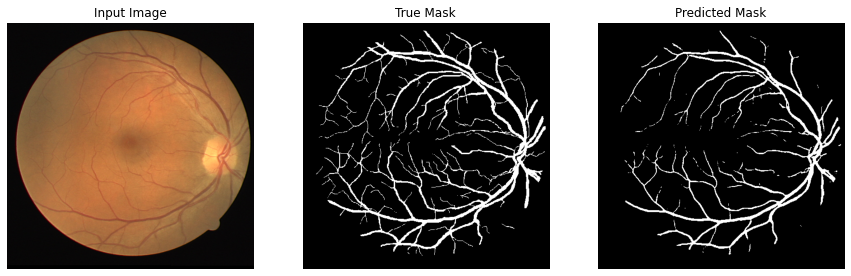


Sample Prediction after epoch 51

Epoch 52/250
9/9 [==============================] - 7s 746ms/step - loss: 0.0794 - accuracy: 0.9743 - val_loss: 0.1036 - val_accuracy: 0.9647

Epoch 00052: val_loss did not improve from 0.10314
Epoch 53/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0791 - accuracy: 0.9742 - val_loss: 0.1059 - val_accuracy: 0.9638

Epoch 00053: val_loss did not improve from 0.10314
Epoch 54/250
9/9 [==============================] - 7s 743ms/step - loss: 0.0788 - accuracy: 0.9740 - val_loss: 0.1040 - val_accuracy: 0.9649

Epoch 00054: val_loss did not improve from 0.10314
Epoch 55/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0782 - accuracy: 0.9741 - val_loss: 0.1016 - val_accuracy: 0.9657

Epoch 00055: val_loss improved from 0.10314 to 0.10160, saving model to /kaggle/Models/model1.h5
Epoch 56/250
9/9 [==============================] - 7s 743ms/step - loss: 0.0774 - accuracy: 0.9742 - val_loss: 0.1005 - val_accuracy: 0.9656



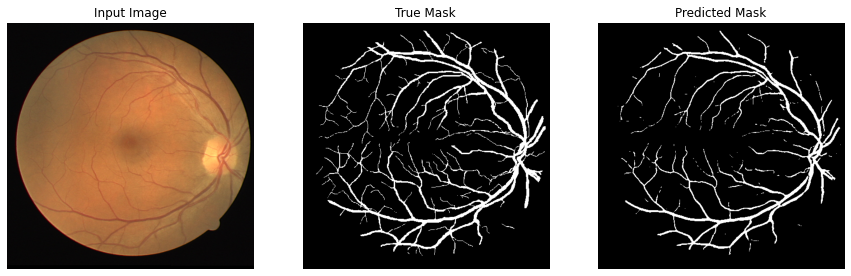


Sample Prediction after epoch 56

Epoch 57/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0767 - accuracy: 0.9744 - val_loss: 0.1028 - val_accuracy: 0.9647

Epoch 00057: val_loss did not improve from 0.10052
Epoch 58/250
9/9 [==============================] - 7s 744ms/step - loss: 0.0760 - accuracy: 0.9745 - val_loss: 0.1035 - val_accuracy: 0.9647

Epoch 00058: val_loss did not improve from 0.10052
Epoch 59/250
9/9 [==============================] - 7s 746ms/step - loss: 0.0749 - accuracy: 0.9748 - val_loss: 0.1030 - val_accuracy: 0.9649

Epoch 00059: val_loss did not improve from 0.10052
Epoch 60/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 0.1028 - val_accuracy: 0.9651

Epoch 00060: val_loss did not improve from 0.10052
Epoch 61/250
9/9 [==============================] - 7s 742ms/step - loss: 0.0743 - accuracy: 0.9748 - val_loss: 0.1042 - val_accuracy: 0.9641

Epoch 00061: val_loss did not improve from 0.1

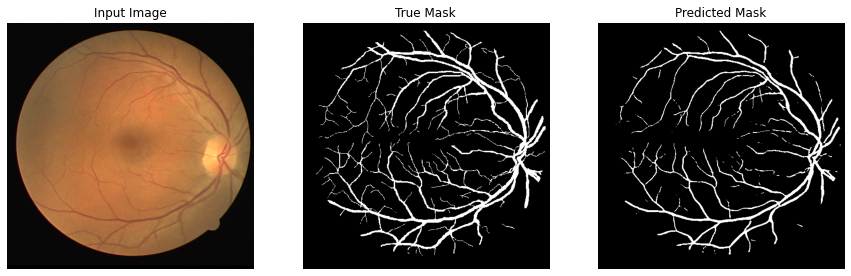


Sample Prediction after epoch 61

Epoch 62/250
9/9 [==============================] - 7s 742ms/step - loss: 0.0734 - accuracy: 0.9750 - val_loss: 0.1030 - val_accuracy: 0.9642

Epoch 00062: val_loss did not improve from 0.10052
Epoch 63/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0726 - accuracy: 0.9751 - val_loss: 0.1051 - val_accuracy: 0.9638

Epoch 00063: val_loss did not improve from 0.10052
Epoch 64/250
9/9 [==============================] - 7s 745ms/step - loss: 0.0720 - accuracy: 0.9753 - val_loss: 0.1045 - val_accuracy: 0.9637

Epoch 00064: val_loss did not improve from 0.10052
Epoch 65/250
9/9 [==============================] - 7s 742ms/step - loss: 0.0718 - accuracy: 0.9752 - val_loss: 0.1013 - val_accuracy: 0.9647

Epoch 00065: val_loss did not improve from 0.10052
Epoch 66/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0716 - accuracy: 0.9751 - val_loss: 0.1022 - val_accuracy: 0.9646

Epoch 00066: val_loss did not improve from 0.1

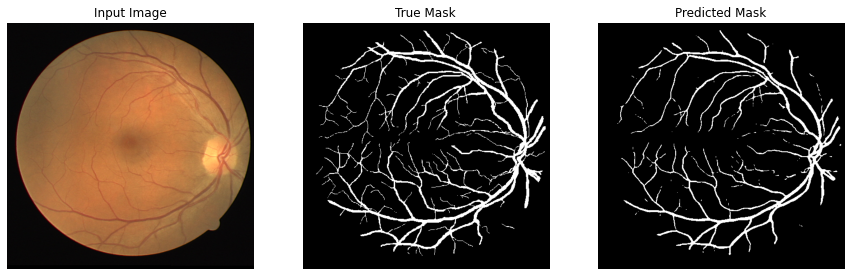


Sample Prediction after epoch 66

Epoch 00066: early stopping


In [33]:
# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = ["accuracy"]

# compile keras model with defined optimozer, loss and metrics
model1.compile(optim, bce, metrics)


history = model1.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [34]:
test_data = '/kaggle/input/dataset/new_data2/new_data2/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data2/new_data2/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data2/new_data2/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data2/

In [35]:
test_mask = '/kaggle/input/dataset/new_data2/new_data2/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data2/new_data2/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data2/new_data2/test

In [36]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
ew_data2/test/image/01_test.tif | a2/new_data2/test/mask/01_test.gif
ew_data2/test/image/02_test.tif | a2/new_data2/test/mask/02_test.gif
ew_data2/test/image/03_test.tif | a2/new_data2/test/mask/03_test.gif
ew_data2/test/image/04_test.tif | a2/new_data2/test/mask/04_test.gif
ew_data2/test/image/05_test.tif | a2/new_data2/test/mask/05_test.gif
ew_data2/test/image/06_test.tif | a2/new_data2/test/mask/06_test.gif
ew_data2/test/image/07_test.tif | a2/new_data2/test/mask/07_test.gif
ew_data2/test/image/08_test.tif | a2/new_data2/test/mask/08_test.gif
ew_data2/test/image/09_test.tif | a2/new_data2/test/mask/09_test.gif
ew_data2/test/image/10_test.tif | a2/new_data2/test/mask/10_test.gif


In [37]:
IMAGE_SIZE = 512
BATCH_SIZE = 12

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [38]:
valid_dataset = test_dataset

In [39]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [41]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model1.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [42]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   4784655
           1       0.87      0.69      0.77    458225

    accuracy                           0.96   5242880
   macro avg       0.92      0.84      0.88   5242880
weighted avg       0.96      0.96      0.96   5242880



In [44]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.6256796451453919


In [45]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.7697453148457604


In [52]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.7558850563945


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'masks' and 'y_pred' are the true labels and predicted probabilities for the positive class.
fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.8411870698790113


(-0.5, 511.5, 511.5, -0.5)

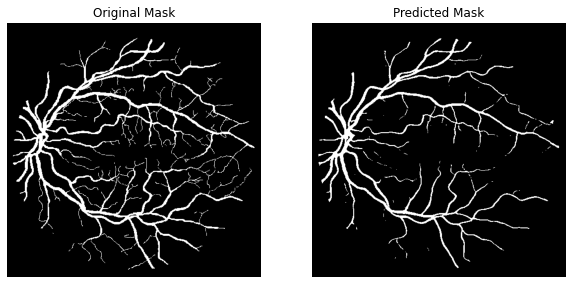

In [47]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model1.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

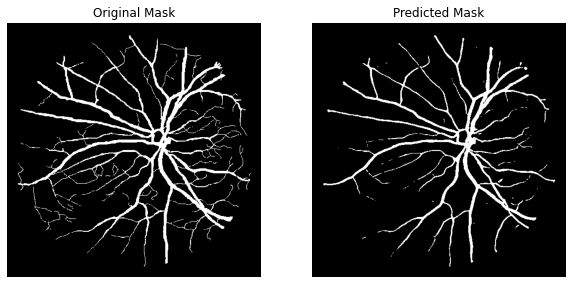

In [49]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model1.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

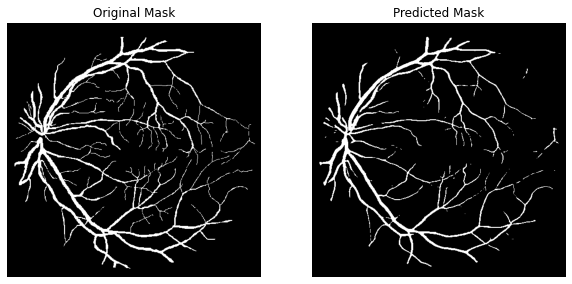

In [50]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model1.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

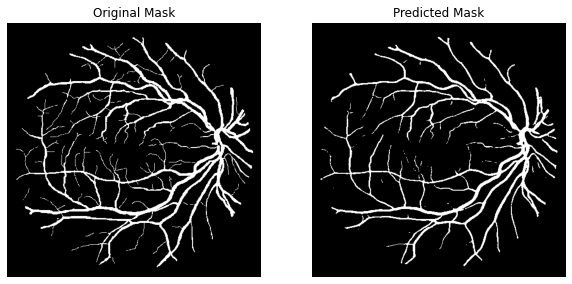

In [51]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model1.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')